# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import datetime as dt
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key
from api_keys import g_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [2]:
cities=[]
# List for holding lat_lngs and cities
lat_lngs = []

loopcounter=5

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        

# Print the city count to confirm sufficient count
print(len(cities))


city_id=[]
clouds=[]
country=[]
date=[]
humidity=[]
lat=[]
lng=[]
maxtemp=[]
windspd=[]
city_checked=[]

url = "http://api.openweathermap.org/data/2.5/weather?"
for city in cities:

    try:
        current_weather=url + "appid=" + weather_api_key + "&q=" + city
        weather_response = requests.get(current_weather)
        weather_json = weather_response.json()

        city_checked.append(weather_json['name'])
        print_city=weather_json['name']
        country.append(weather_json['sys']['country'])
        clouds.append(weather_json['clouds']['all'])
        humidity.append(weather_json['main']['humidity'])
        lat.append(weather_json['coord']['lat'])
        lng.append(weather_json['coord']['lon'])
        maxtemp.append(weather_json['main']['temp_max'])
        windspd.append(weather_json['wind']['speed'])
        date.append(weather_json['dt'])
        city_id.append(weather_json['id'])
        print_id=weather_json['id']

        print(f'json id is {print_id} is {print_city}')
    except(KeyError, IndexError):
        print("Missing field/result -- skipping")
        continue


        
#convert temperatures
for index in range(0, len(maxtemp)):
    #print(maxtemp[index])
    maxtemp[index]=round(((maxtemp[index]-273.5)*9/5+32),2)
    #print(maxtemp[index])
#convert time
for time_index in range(0,len(date)):
    date[time_index]=dt.datetime.fromtimestamp(date[time_index])
    #print(date[time_index])
    

Process_df=pd.DataFrame(city_id)
Process_df.rename(columns={0:'City ID'}, inplace=True)
Process_df['City']=city_checked
Process_df['Country']=country
Process_df['Lat']=lat
Process_df['Lon']=lng
Process_df['Cloudiness']=clouds
Process_df['Humidity']=humidity
Process_df['Max Temp']=maxtemp
Process_df['Wind Speed']=windspd
Process_df['Date']=date
Process_df.set_index('City ID')
Process_df


622
json id is 2155415 is New Norfolk
json id is 3366880 is Hermanus
json id is 2068110 is Kununurra
json id is 5850554 is Makakilo City
json id is 5847411 is Kahului
json id is 5106841 is Albany
json id is 2110227 is Butaritari
json id is 4021858 is Guerrero Negro
json id is 1684803 is Tabuk
json id is 2125906 is Dukat
json id is 3466165 is Cidreira
json id is 2206939 is Bluff
json id is 1525376 is Bestöbe
json id is 6201424 is Mataura
json id is 3874787 is Punta Arenas
json id is 3380290 is Sinnamary
Missing field/result -- skipping
json id is 3526966 is Huehuetán
json id is 2180815 is Tuatapere
json id is 1793385 is Tangjiazhuang
json id is 5855927 is Hilo
json id is 2094342 is Kavieng
json id is 1488903 is Turukhansk
json id is 6355222 is Yulara
json id is 3369157 is Cape Town
json id is 1015776 is Bredasdorp
json id is 1529569 is Changji
json id is 5983720 is Iqaluit
Missing field/result -- skipping
json id is 2624652 is Holme
json id is 964420 is Port Elizabeth
json id is 5820705

json id is 6137462 is Saint-Augustin
json id is 1213855 is Sibolga
json id is 3697441 is El Alto
json id is 1488414 is Urengoy
json id is 1799686 is Tongzi
Missing field/result -- skipping
json id is 3939761 is Hualmay
json id is 2191562 is Dunedin
Missing field/result -- skipping
json id is 2126199 is Cherskiy
json id is 1267390 is Kavaratti
json id is 686090 is Asău
json id is 2093846 is Kiunga
json id is 2189343 is Kaeo
json id is 5026416 is Fergus Falls
Missing field/result -- skipping
json id is 2020824 is Lermontovka
json id is 3517970 is Pochutla
json id is 1651103 is Atambua
json id is 1267290 is Kenda
json id is 1786657 is Yinchuan
json id is 3471451 is Arraial do Cabo
json id is 2022572 is Khatanga
json id is 3576994 is Cockburn Town
json id is 2159220 is Mackay
json id is 1254709 is Tezu
json id is 5859699 is College
json id is 2122104 is Petropavlovsk-Kamchatskiy
json id is 1282256 is Hithadhoo
json id is 178077 is Wote
json id is 3388760 is São Geraldo do Araguaia
json id 

json id is 3372472 is Vila Franca do Campo
json id is 5919815 is Channel-Port aux Basques
json id is 1507116 is Dudinka
json id is 5188075 is East Stroudsburg
json id is 1735076 is Butterworth
json id is 3437107 is San Cosme y Damián
json id is 2738381 is Lata
json id is 3451051 is Rio Verde de Mato Grosso
json id is 5554428 is Ketchikan
json id is 506232 is Porosozero
json id is 1106643 is Quatre Cocos
json id is 1797929 is Qingdao
json id is 3645213 is Coro
json id is 6111867 is Port Hawkesbury
json id is 924102 is Rumphi
json id is 1128239 is Rūdbār
json id is 2426370 is Umm Hājar
json id is 2016216 is Sosnovo-Ozerskoye
json id is 4018904 is Álamos
json id is 1495586 is Parabel'
json id is 2179103 is Whitianga
json id is 286621 is Salalah
json id is 2144528 is Warrnambool
json id is 1638775 is Payo
json id is 1263997 is Mahabalipuram
json id is 98182 is Baghdad
json id is 6148373 is Sioux Lookout
json id is 3414079 is Olafsvik
json id is 1058381 is Morondava
json id is 3870243 is Ta

,City ID,City,Country,Lat,Lon,Cloudiness,Humidity,Max Temp,Wind Speed,Date
0,2155415,New Norfolk,AU,-42.7826,147.0587,99,78,50.38,1.55,2021-04-24 09:03:51
1,3366880,Hermanus,ZA,-34.4187,19.2345,100,58,74.37,0.89,2021-04-24 09:04:10
2,2068110,Kununurra,AU,-15.7667,128.7333,7,52,67.37,2.06,2021-04-24 09:04:10
3,5850554,Makakilo City,US,21.3469,-158.0858,20,73,72.77,2.57,2021-04-24 09:02:11
4,5847411,Kahului,US,20.8947,-156.4700,20,88,70.97,5.14,2021-04-24 08:59:25
...,...,...,...,...,...,...,...,...,...,...
574,1633070,Palembang,ID,-2.9167,104.7458,20,66,85.37,2.13,2021-04-24 09:06:20
575,2012938,Yerofey Pavlovich,RU,53.9667,121.9667,0,66,32.85,1.72,2021-04-24 09:06:20
576,3374083,Bathsheba,BB,13.2167,-59.5167,40,54,83.57,7.72,2021-04-24 09:06:20
577,3430708,Mercedes,AR,-34.6515,-59.4307,33,85,66.36,1.79,2021-04-24 09:06:21


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
Process_df.to_csv('..\output_data\Weather.csv')
Process_df

,City ID,City,Country,Lat,Lon,Cloudiness,Humidity,Max Temp,Wind Speed,Date
0,2155415,New Norfolk,AU,-42.7826,147.0587,99,78,50.38,1.55,2021-04-24 09:03:51
1,3366880,Hermanus,ZA,-34.4187,19.2345,100,58,74.37,0.89,2021-04-24 09:04:10
2,2068110,Kununurra,AU,-15.7667,128.7333,7,52,67.37,2.06,2021-04-24 09:04:10
3,5850554,Makakilo City,US,21.3469,-158.0858,20,73,72.77,2.57,2021-04-24 09:02:11
4,5847411,Kahului,US,20.8947,-156.4700,20,88,70.97,5.14,2021-04-24 08:59:25
...,...,...,...,...,...,...,...,...,...,...
574,1633070,Palembang,ID,-2.9167,104.7458,20,66,85.37,2.13,2021-04-24 09:06:20
575,2012938,Yerofey Pavlovich,RU,53.9667,121.9667,0,66,32.85,1.72,2021-04-24 09:06:20
576,3374083,Bathsheba,BB,13.2167,-59.5167,40,54,83.57,7.72,2021-04-24 09:06:20
577,3430708,Mercedes,AR,-34.6515,-59.4307,33,85,66.36,1.79,2021-04-24 09:06:21


In [6]:
#give statistics for the frame
Process_df.describe()

,City ID,Lat,Lon,Cloudiness,Humidity,Max Temp,Wind Speed
count,5.790000e+02,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000
mean,2.696637e+06,20.587187,22.935458,55.632124,67.279793,60.901244,3.443316
std,1.676731e+06,33.415283,90.474399,38.696554,24.278327,21.867188,2.273570
min,4.974700e+04,-54.800000,-175.200000,0.000000,4.000000,-11.600000,0.280000
25%,1.519360e+06,-7.279300,-57.715650,18.000000,53.000000,45.770000,1.760000
50%,2.180815e+06,24.144700,25.200000,70.000000,73.000000,62.370000,3.090000
75%,3.552688e+06,49.898900,102.382750,94.500000,87.000000,78.370000,4.620000
max,8.079926e+06,78.218600,179.316700,100.000000,100.000000,106.970000,15.950000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
Process_df.columns
print_date=Process_df.loc[1]['Date']
print(print_date)
#Get the indices of cities that have humidity over 100%.
#  needs logic for this - check humidity column 

2021-04-24 09:04:10


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data=Process_df.loc[Process_df.Humidity<100,:]
clean_city_data

,City ID,City,Country,Lat,Lon,Cloudiness,Humidity,Max Temp,Wind Speed,Date
0,2155415,New Norfolk,AU,-42.7826,147.0587,99,78,50.38,1.55,2021-04-24 09:03:51
1,3366880,Hermanus,ZA,-34.4187,19.2345,100,58,74.37,0.89,2021-04-24 09:04:10
2,2068110,Kununurra,AU,-15.7667,128.7333,7,52,67.37,2.06,2021-04-24 09:04:10
3,5850554,Makakilo City,US,21.3469,-158.0858,20,73,72.77,2.57,2021-04-24 09:02:11
4,5847411,Kahului,US,20.8947,-156.4700,20,88,70.97,5.14,2021-04-24 08:59:25
...,...,...,...,...,...,...,...,...,...,...
574,1633070,Palembang,ID,-2.9167,104.7458,20,66,85.37,2.13,2021-04-24 09:06:20
575,2012938,Yerofey Pavlovich,RU,53.9667,121.9667,0,66,32.85,1.72,2021-04-24 09:06:20
576,3374083,Bathsheba,BB,13.2167,-59.5167,40,54,83.57,7.72,2021-04-24 09:06:20
577,3430708,Mercedes,AR,-34.6515,-59.4307,33,85,66.36,1.79,2021-04-24 09:06:21


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [11]:
#take date from data frame
#print_date

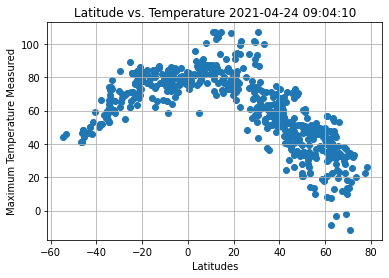

In [9]:
latitude=clean_city_data['Lat']
temp=clean_city_data['Max Temp']
plt.scatter(latitude, temp, marker='o')
plt.xlabel('Latitudes')
plt.ylabel('Maximum Temperature Measured')
plt.title(f'Latitude vs. Temperature {print_date}')
plt.grid(True)
plt.savefig('images/LatTemp.png')
plt.show()

Observations:  Temperatures measured at specific latitudes show a predictable result.  Higher temperatures occur at lower latitudes and lower temperatures occur at higher latitudes, with the highest recorded temperatures at the 0 to 20 latitudes. This information can be considered reliable for the data population analyzed - the charts below show r-values of .76 and -.8 for Northern and Southern Hemisphere temperatures recorded.

## Latitude vs. Humidity Plot

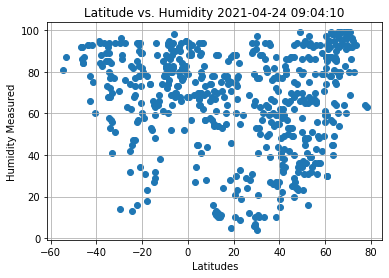

In [10]:
latitude=clean_city_data['Lat']
humidity=clean_city_data['Humidity']
plt.scatter(latitude, humidity, marker='o')
plt.xlabel('Latitudes')
plt.ylabel('Humidity Measured')
plt.title(f'Latitude vs. Humidity {print_date}')
plt.grid(True)
plt.savefig('images/LatHum.png')
plt.show()

Observations:  There is a noticable trend of more readings for high humidity at all of the latitudes recorded for this data population but the charts for Northern and Southern Hemisphere humidity do not show r-values of any significance.  For the northern hemisphere readings the r-value was -.04, for the southern hemisphere the r-value was .22 which was a little stronger.  To get a better correlation, the size of the data set should be increased to see if a trend could be better identified.

## Latitude vs. Cloudiness Plot

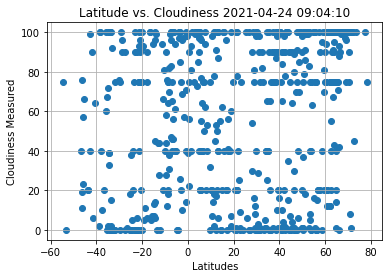

In [11]:
latitude=clean_city_data['Lat']
clouds=clean_city_data['Cloudiness']
plt.scatter(latitude, clouds, marker='o')
plt.xlabel('Latitudes')
plt.ylabel('Cloudiness Measured')
plt.title(f'Latitude vs. Cloudiness {print_date}')
plt.grid(True)
plt.savefig('images/LatCld.png')
plt.show()

## Latitude vs. Wind Speed Plot

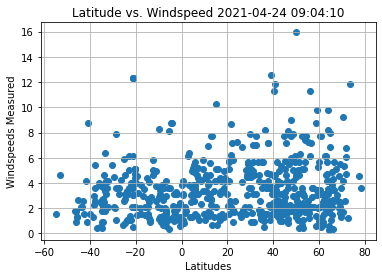

In [12]:
latitude=Process_df['Lat']
windspeed=Process_df['Wind Speed']
plt.scatter(latitude, windspeed,marker='o')
plt.xlabel('Latitudes')
plt.ylabel('Windspeeds Measured')
plt.title(f'Latitude vs. Windspeed {print_date}')
plt.grid(True)
plt.savefig('images/LatWind.png')
plt.show()

Observations:  There is a noticeable distribution of recorded wind speed readings between 0 and 6 mph for all latitudes measured.  The r-values for the northern hemisphere was .05 and .02 for the southern hemisphere, which suggests that while the distribution can be seen, it is not easily mapped to a line or curve.  To get a clearer picture of what the windspeed distribution is in each latitude, a larger data population should be looked at with outliers cleaned out of the data set to see if there is a measurable trend that shows windspeeds by latitude.



## Linear Regression

In [13]:
#values are based on geographical locations
#negative values are southern hemisphere - positive values are northern hemisphere
#extract the two values into data frames that are labeled north and south
# use Process_df
city_count=len(clean_city_data)
print(city_count)  

S_Hem=clean_city_data.query('Lat>0')
S_Hem.reindex()
#print(S_Hem)
N_Hem=clean_city_data.query('Lat<0')
N_Hem.reindex()
#print(N_Hem)

565


,City ID,City,Country,Lat,Lon,Cloudiness,Humidity,Max Temp,Wind Speed,Date
0,2155415,New Norfolk,AU,-42.7826,147.0587,99,78,50.38,1.55,2021-04-24 09:03:51
1,3366880,Hermanus,ZA,-34.4187,19.2345,100,58,74.37,0.89,2021-04-24 09:04:10
2,2068110,Kununurra,AU,-15.7667,128.7333,7,52,67.37,2.06,2021-04-24 09:04:10
10,3466165,Cidreira,BR,-30.1811,-50.2056,76,71,71.80,5.41,2021-04-24 09:04:11
11,2206939,Bluff,NZ,-46.6000,168.3333,40,92,41.38,1.79,2021-04-24 09:04:12
...,...,...,...,...,...,...,...,...,...,...
566,1633034,Palu,ID,-0.8917,119.8707,71,95,76.03,0.62,2021-04-24 09:06:18
569,3452324,Presidente Prudente,BR,-22.1256,-51.3889,0,56,69.17,3.60,2021-04-24 09:04:04
570,1067565,Beloha,MG,-25.1667,45.0500,0,32,89.13,5.90,2021-04-24 09:06:19
574,1633070,Palembang,ID,-2.9167,104.7458,20,66,85.37,2.13,2021-04-24 09:06:20


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R-value is: 0.765741484157329


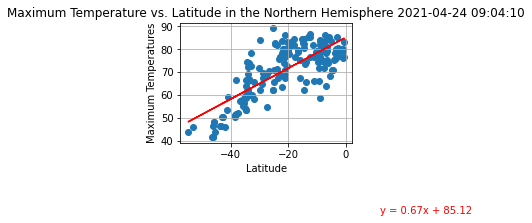

In [14]:
x_values=N_Hem['Lat']
y_values=N_Hem['Max Temp']   
(slope, intercept, rvalue, pvalue,stderr)=linregress(x_values,y_values)
regress_values=x_values * slope + intercept
line_eq="y = " + str(round(slope,2)) + "x + "+str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values,'r-')
plt.annotate(line_eq,(12,8),fontsize=10,color='red',annotation_clip=False)
plt.xlabel('Latitude')
plt.ylabel("Maximum Temperatures")
plt.title(f'Maximum Temperature vs. Latitude in the Northern Hemisphere {print_date}')
plt.grid(True)
plt.tight_layout()
print(f'R-value is: {rvalue}')
plt.savefig("images/NH_MaxTemp.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R-value is: -0.8464031145648274


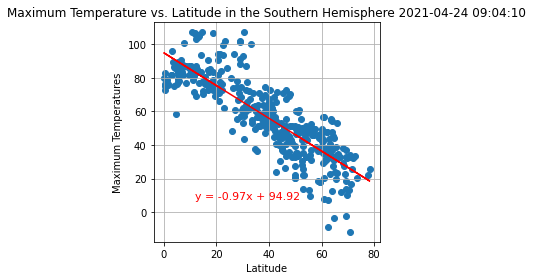

In [15]:
x_values=S_Hem['Lat']
y_values=S_Hem['Max Temp']   
(slope, intercept, rvalue, pvalue,stderr)=linregress(x_values,y_values)
regress_values=x_values * slope + intercept
line_eq="y = " + str(round(slope,2)) + "x + "+str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values,'r-')
plt.annotate(line_eq,(12,8),fontsize=11,color='red',annotation_clip=False)
plt.xlabel('Latitude')
plt.ylabel("Maximum Temperatures")
plt.title(f'Maximum Temperature vs. Latitude in the Southern Hemisphere {print_date}')
plt.grid(True)
plt.tight_layout()
print(f'R-value is: {rvalue}')
plt.savefig('images/SH_MaxTemp.png')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R-value is: -0.04623717595885685


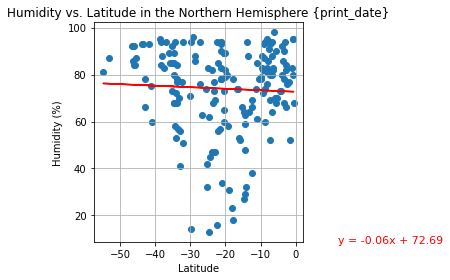

In [16]:
x_values=N_Hem['Lat']
y_values=N_Hem['Humidity']   
(slope, intercept, rvalue, pvalue,stderr)=linregress(x_values,y_values)
regress_values=x_values * slope + intercept
line_eq="y = " + str(round(slope,2)) + "x + "+str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values,'r-')
plt.annotate(line_eq,(12,8),fontsize=11,color='red',annotation_clip=False)
plt.ylabel("Humidity (%)")
plt.xlabel('Latitude')
plt.title('Humidity vs. Latitude in the Northern Hemisphere {print_date}')
plt.grid(True)
plt.tight_layout()
print(f'R-value is: {rvalue}')
plt.savefig('images/NH_Humidity.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R-value is: 0.22246800283265608


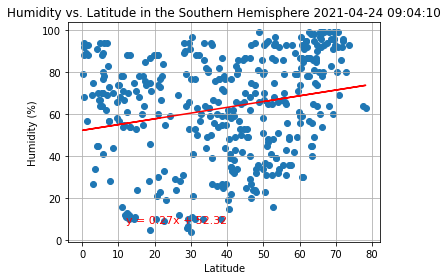

In [17]:
x_values=S_Hem['Lat']
y_values=S_Hem['Humidity']   
(slope, intercept, rvalue, pvalue,stderr)=linregress(x_values,y_values)
regress_values=x_values * slope + intercept
line_eq="y = " + str(round(slope,2)) + "x + "+str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values,'r-')
plt.annotate(line_eq,(12,8),fontsize=11,color='red',annotation_clip=False)
plt.ylabel("Humidity (%)")
plt.xlabel('Latitude')
plt.title(f'Humidity vs. Latitude in the Southern Hemisphere {print_date}')
plt.grid(True)
plt.tight_layout()
print(f'R-value is: {rvalue}')
plt.savefig('images/SH_Humidity.png')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R-value is: 0.16146596194247334


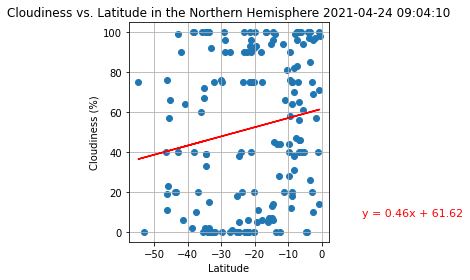

In [18]:
x_values=N_Hem['Lat']
y_values=N_Hem['Cloudiness']   
(slope, intercept, rvalue, pvalue,stderr)=linregress(x_values,y_values)
regress_values=x_values * slope + intercept
line_eq="y = " + str(round(slope,2)) + "x + "+str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values,'r-')
plt.annotate(line_eq,(12,8),fontsize=11,color='red',annotation_clip=False)
plt.ylabel("Cloudiness (%)")
plt.xlabel('Latitude')
plt.title(f'Cloudiness vs. Latitude in the Northern Hemisphere {print_date}')
plt.grid(True)
plt.tight_layout()
print(f'R-value is: {rvalue}')
plt.savefig('images/NH_Cloudiness.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R-value is: 0.16619436113084743


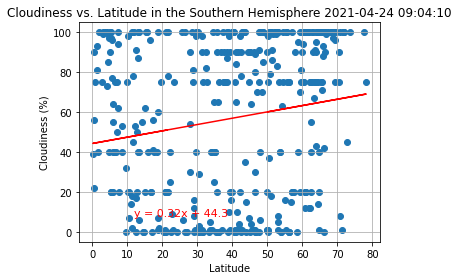

In [19]:
x_values=S_Hem['Lat']
y_values=S_Hem['Cloudiness']   
(slope, intercept, rvalue, pvalue,stderr)=linregress(x_values,y_values)
regress_values=x_values * slope + intercept
line_eq="y = " + str(round(slope,2)) + "x + "+str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values,'r-')
plt.annotate(line_eq,(12,8),fontsize=11,color='red',annotation_clip=False)
plt.ylabel("Cloudiness (%)")
plt.xlabel('Latitude')
plt.title(f'Cloudiness vs. Latitude in the Southern Hemisphere {print_date}')
plt.grid(True)
plt.tight_layout()
print(f'R-value is: {rvalue}')
plt.savefig('images/SH_Cloudiness.png')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R-value is: -0.056959514433813266


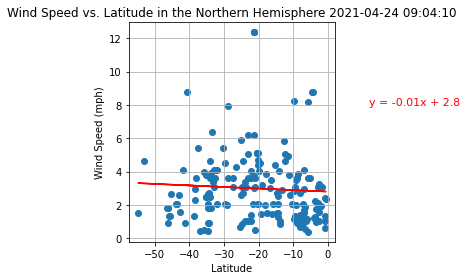

In [20]:
x_values=N_Hem['Lat']
y_values=N_Hem['Wind Speed']   
(slope, intercept, rvalue, pvalue,stderr)=linregress(x_values,y_values)
regress_values=x_values * slope + intercept
line_eq="y = " + str(round(slope,2)) + "x + "+str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values,'r-')
plt.annotate(line_eq,(12,8),fontsize=11,color='red',annotation_clip=False)
plt.ylabel("Wind Speed (mph)")
plt.xlabel('Latitude')
plt.title(f'Wind Speed vs. Latitude in the Northern Hemisphere {print_date}')
plt.grid(True)
plt.tight_layout()
print(f'R-value is: {rvalue}')
plt.savefig('images/NH_WindSpeed.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R-value is: 0.02596731443230707


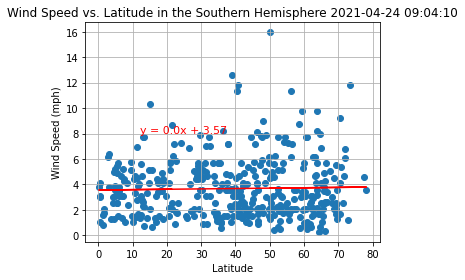

In [21]:
x_values=S_Hem['Lat']
y_values=S_Hem['Wind Speed']   
(slope, intercept, rvalue, pvalue,stderr)=linregress(x_values,y_values)
regress_values=x_values * slope + intercept
line_eq="y = " + str(round(slope,2)) + "x + "+str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values,'r-')
plt.annotate(line_eq,(12,8),fontsize=11,color='red',annotation_clip=False)
plt.ylabel("Wind Speed (mph)")
plt.xlabel('Latitude')
plt.title(f'Wind Speed vs. Latitude in the Southern Hemisphere {print_date}')
plt.grid(True)
plt.tight_layout()
print(f'R-value is: {rvalue}')
plt.savefig('images/SH_Windspeed.png')
plt.show()